In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Depression_student5.csv')
data.head()


,1. Age,3. University,4. Department,6. Current CGPA,"1. In a semester, how often have you had little interest or pleasure in doing things?","2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression
0,1,8,2,1,1,2,1,1,2,1,1,1,1,3
1,1,8,2,4,1,1,1,1,1,1,1,1,1,2
2,1,8,2,2,2,0,2,3,2,2,2,2,1,4
3,1,8,2,3,1,1,1,1,1,1,1,1,1,2
4,1,8,2,3,1,1,1,1,1,1,1,1,1,2


In [ ]:
# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression']

# Print the feature matrix X and target variable y
print(X)
print(y)

      1. Age  3. University  4. Department  6. Current CGPA  \
0          1              8              2                1   
1          1              8              2                4   
2          1              8              2                2   
3          1              8              2                3   
4          1              8              2                3   
...      ...            ...            ...              ...   
1972       2              2              0                3   
1973       2              2             10                3   
1974       2              2              0                4   
1975       2              2             10                2   
1976       2              8              2                1   

      1. In a semester, how often have you had little interest or pleasure in doing things?   \
0                                                     1                                        
1                                                  

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8308080808080808
Weighted Precision: 0.834471326831199
Micro Precision: 0.8308080808080808
Macro Precision: 0.8583798371377759
Precision per class: [1.         0.85714286 0.74683544 0.78431373 0.85981308 0.90217391]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.86      0.38      0.52        16
           2       0.75      0.83      0.79        71
           3       0.78      0.84      0.81        95
           4       0.86      0.82      0.84       112
           5       0.90      0.89      0.90        93

    accuracy                           0.83       396
   macro avg       0.86      0.79      0.81       396
weighted avg       0.83      0.83      0.83       396



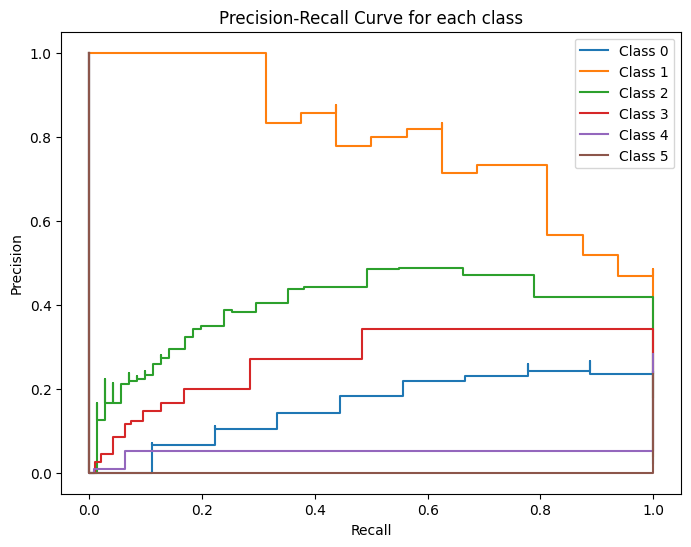

<ipython-input-6-d604914b6937>:71: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-6-d604914b6937>:71: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-6-d604914b6937>:71: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-6-d604914b6937>:71: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-6-d604914b6937>:71: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


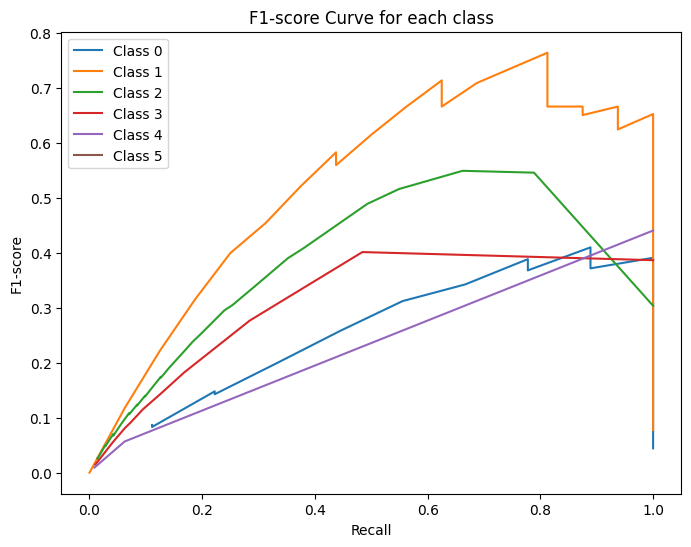

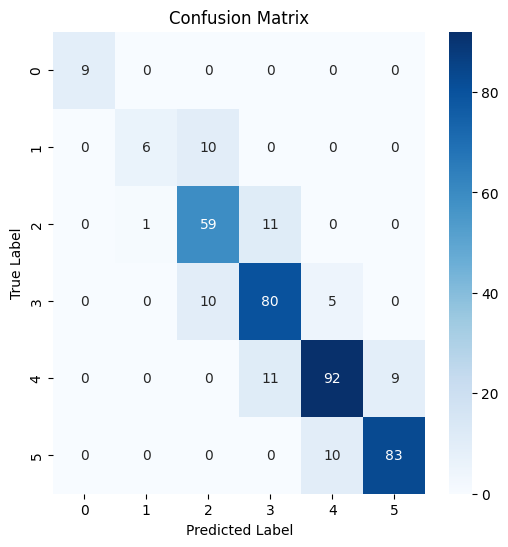

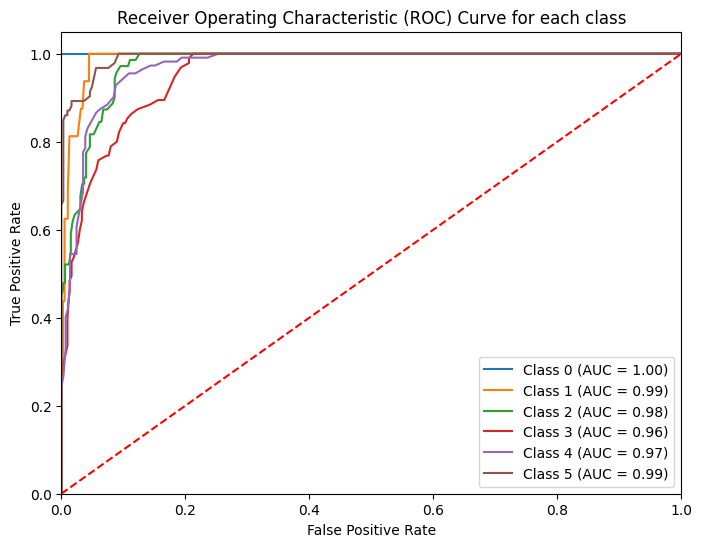

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Train the model with noisy data
rf_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs  # Use the calculated y_pred_probs
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs)
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = rf_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.898989898989899
Weighted Precision: 0.9021282922956202
Micro Precision: 0.898989898989899
Macro Precision: 0.8660116343702682
Precision per class: [1.         0.58333333 0.77647059 0.93548387 0.95454545 0.94623656]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.58      0.44      0.50        16
           2       0.78      0.93      0.85        71
           3       0.94      0.92      0.93        95
           4       0.95      0.94      0.95       112
           5       0.95      0.95      0.95        93

    accuracy                           0.90       396
   macro avg       0.87      0.75      0.78       396
weighted avg       0.90      0.90      0.90       396



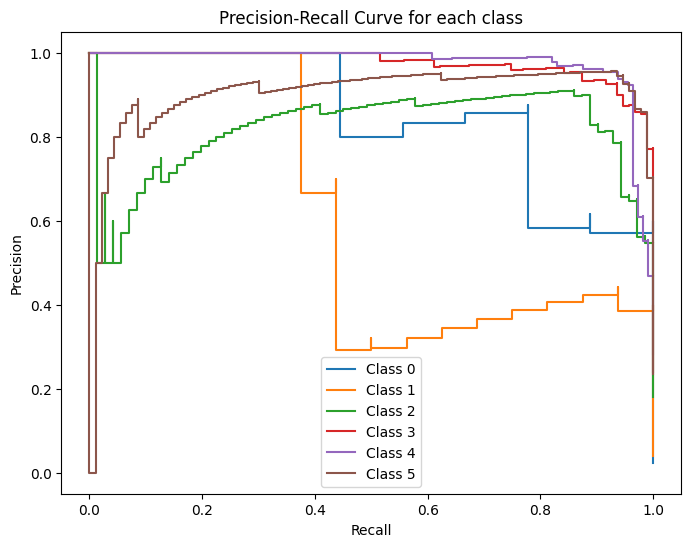

<ipython-input-7-67201e9f825b>:77: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


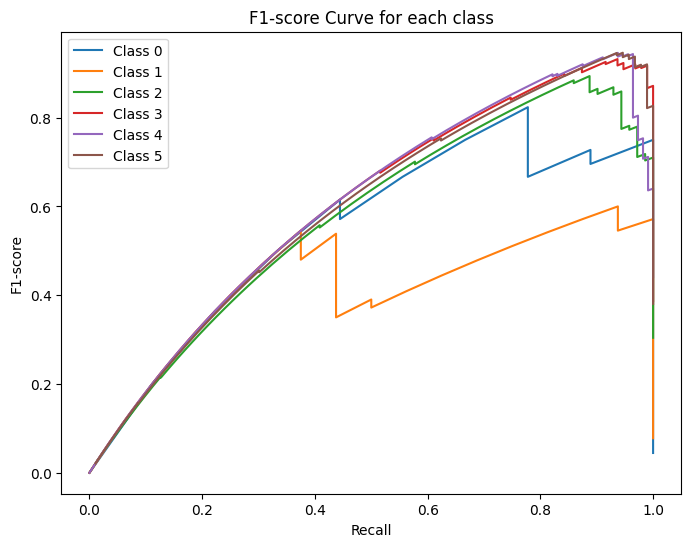

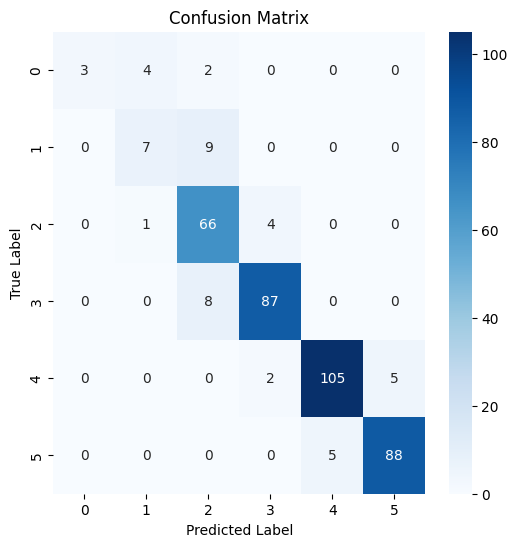

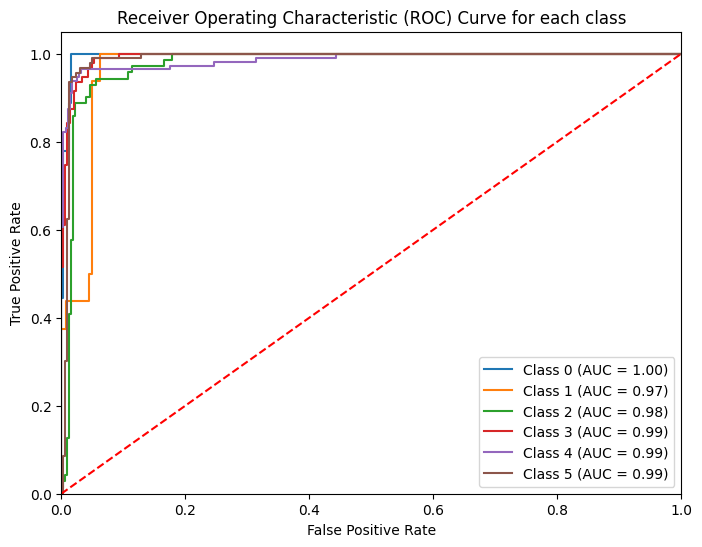

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Support Vector Classifier with a linear kernel
svc = SVC(kernel='rbf', random_state=42)

# Use CalibratedClassifierCV to enable probability estimates
svc_classifier = CalibratedClassifierCV(svc)

# Train the model on the noisy data
svc_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = svc_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = svc_classifier.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs[:, class_label]
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, class_label])
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.6919191919191919
Weighted Precision: 0.6957518593734326
Micro Precision: 0.6919191919191919
Macro Precision: 0.6058353939973641
Precision per class: [0.5        0.3        0.58878505 0.70588235 0.74226804 0.79807692]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.30      0.19      0.23        16
           2       0.59      0.89      0.71        71
           3       0.71      0.51      0.59        95
           4       0.74      0.64      0.69       112
           5       0.80      0.89      0.84        93

    accuracy                           0.69       396
   macro avg       0.61      0.61      0.60       396
weighted avg       0.70      0.69      0.68       396



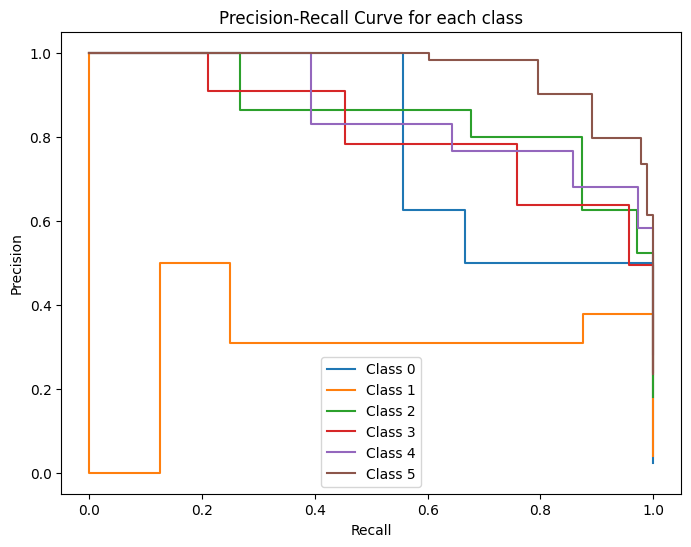

<ipython-input-8-5d18471b20b5>:65: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


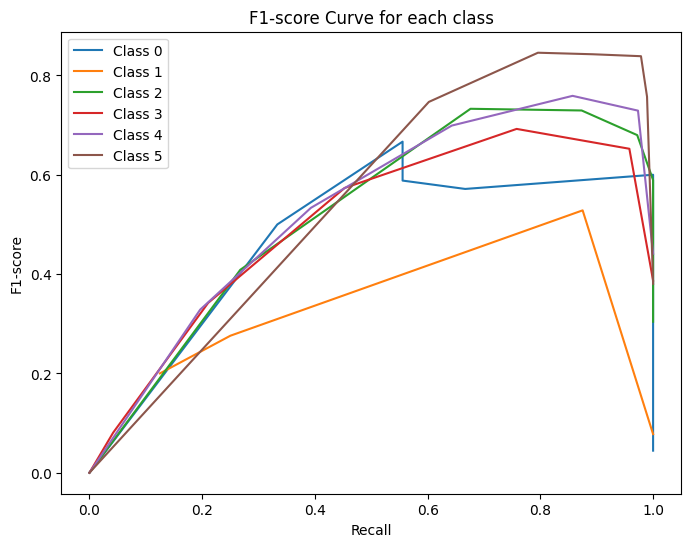

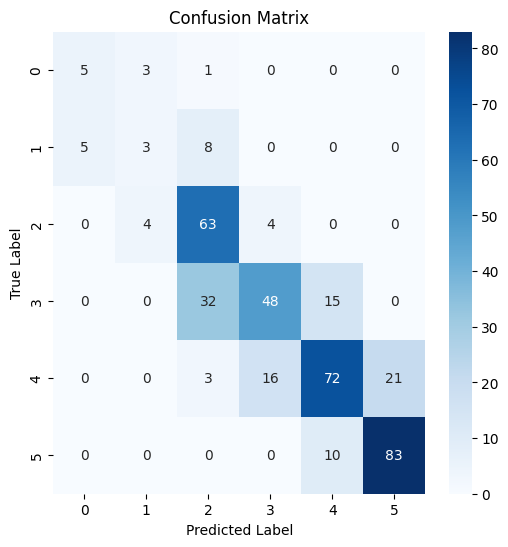

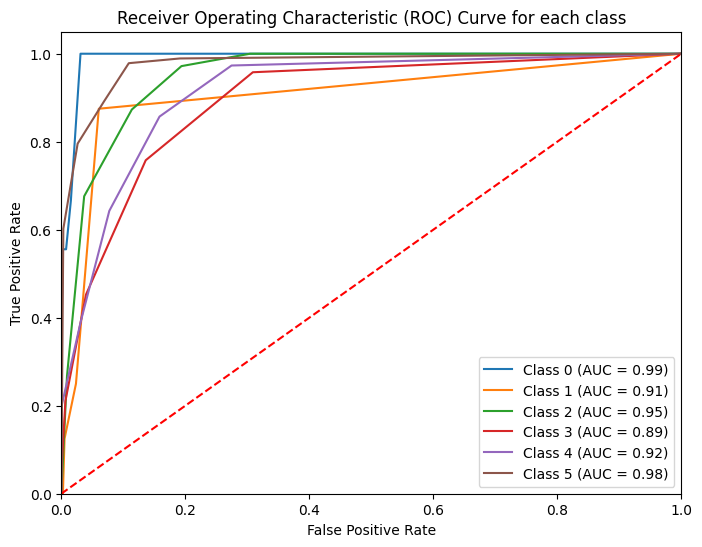

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the K-Nearest Neighbors Classifier with hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

# Train the model using noisy data
knn_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = knn_classifier.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs[:, class_label]
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, class_label])
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from lightgbm import LGBMClassifier
import re

# Function to clean feature names
def clean_feature_names(df):
    # Replace special characters with underscores
    df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]
    return df

# Assuming X_train is your DataFrame containing features
# Assuming y_train is your target variable
# Assuming X_train and y_train are already defined

# Clean feature names
X_train_clean = clean_feature_names(X_train)

# Initialize the LGBM Classifier
lgbm_classifier = LGBMClassifier()

# Train the model
lgbm_classifier.fit(X_train_clean, y_train)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 1264, number of used features: 13
[LightGBM] [Info] Start training from score -3.774741
[LightGBM] [Info] Start training from score -3.064499
[LightGBM] [Info] Start training from score -1.558540
[LightGBM] [Info] Start training from score -1.486045
[LightGBM] [Info] Start training from score -1.428304
[LightGBM] [Info] Start training from score -1.370595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

LGBMClassifier()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 1264, number of used features: 13
[LightGBM] [Info] Start training from score -3.774741
[LightGBM] [Info] Start training from score -3.064499
[LightGBM] [Info] Start training from score -1.558540
[LightGBM] [Info] Start training from score -1.486045
[LightGBM] [Info] Start training from score -1.428304
[LightGBM] [Info] Start training from score -1.370595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

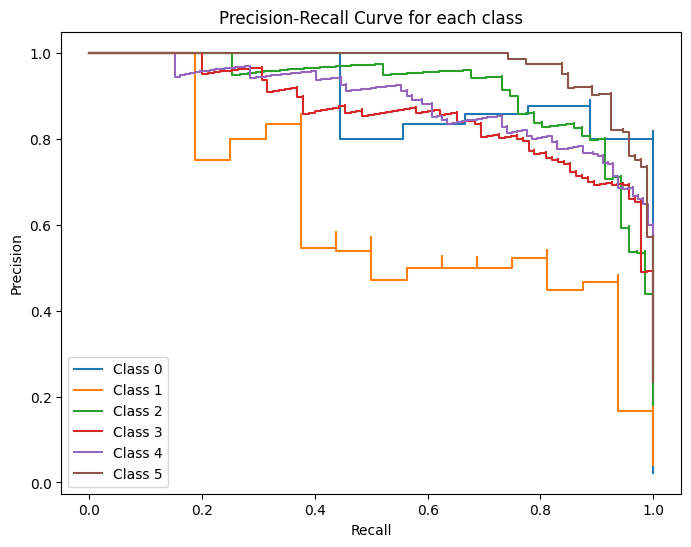

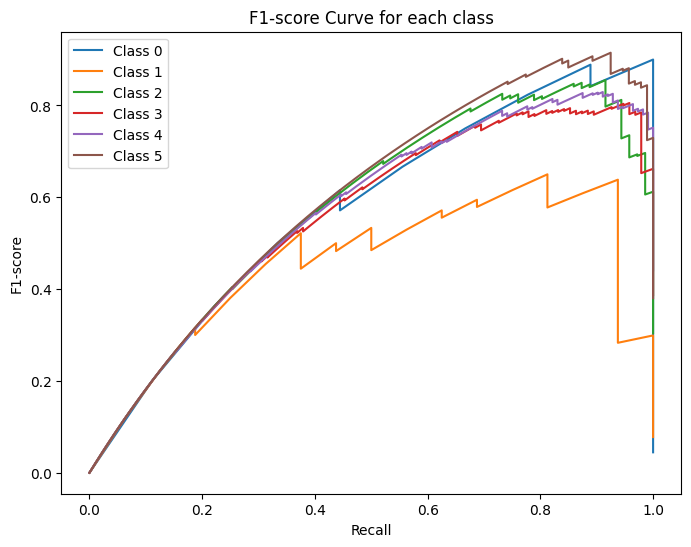

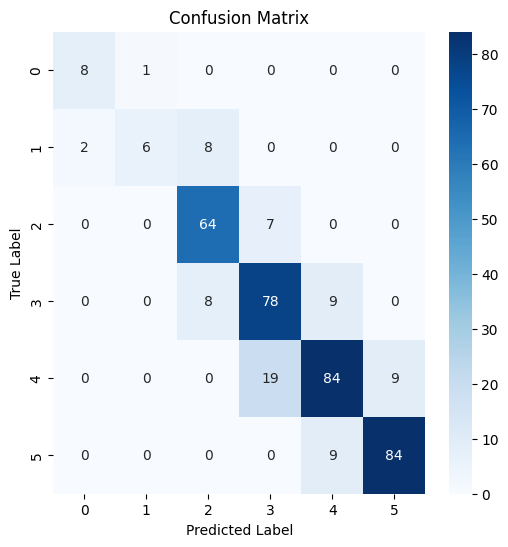

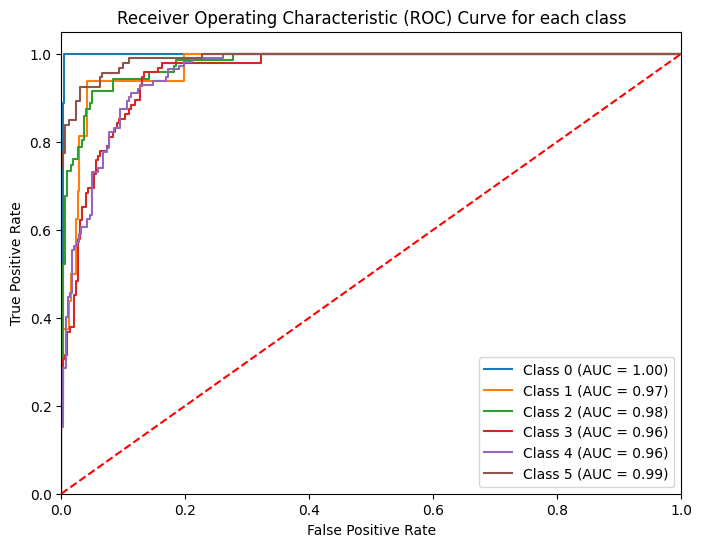

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the LightGBM Classifier with hyperparameters
lgbm_classifier = LGBMClassifier()

# Train the model on the noisy data
lgbm_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = lgbm_classifier.predict(X_test)
y_pred_probs = lgbm_classifier.predict_proba(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs[:, class_label]
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, class_label])
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 0.8131313131313131
Weighted Precision: 0.8116855785996113
Micro Precision: 0.8131313131313131
Macro Precision: 0.768207394962055
Precision per class: [0.88888889 0.45454545 0.71084337 0.79120879 0.86792453 0.89583333]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.45      0.31      0.37        16
           2       0.71      0.83      0.77        71
           3       0.79      0.76      0.77        95
           4       0.87      0.82      0.84       112
           5       0.90      0.92      0.91        93

    accuracy                           0.81       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.81      0.81      0.81       396



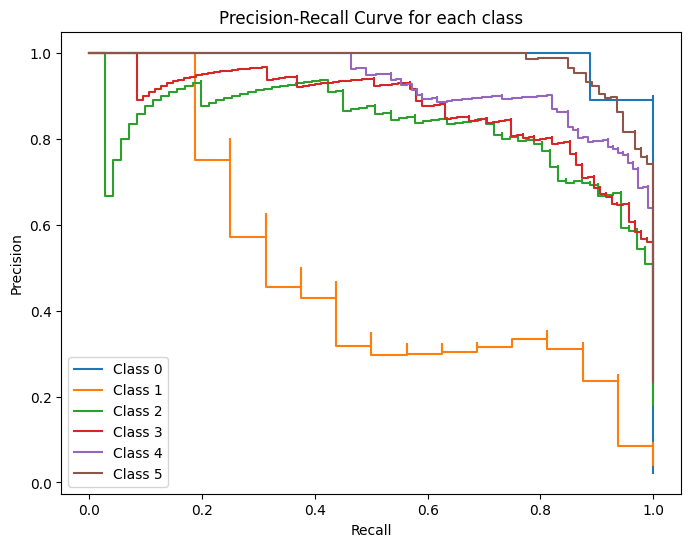

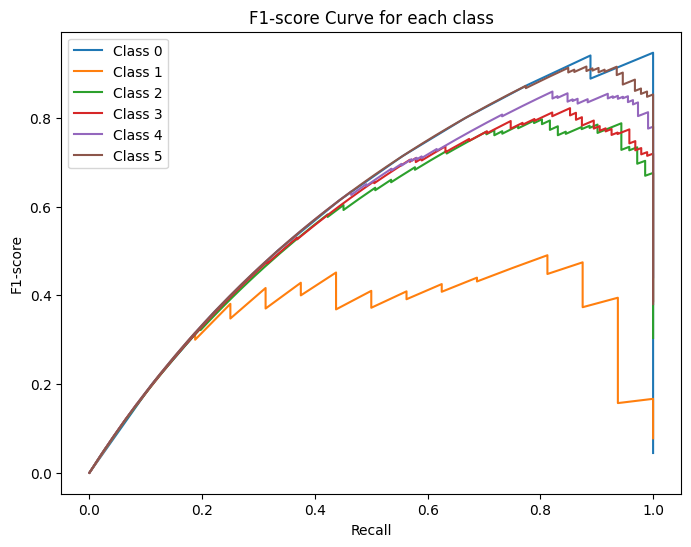

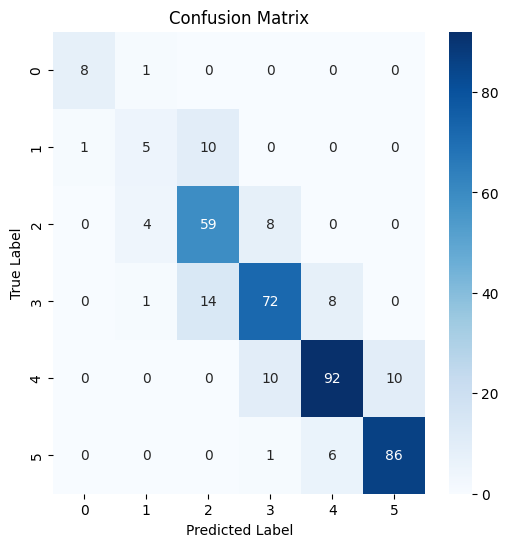

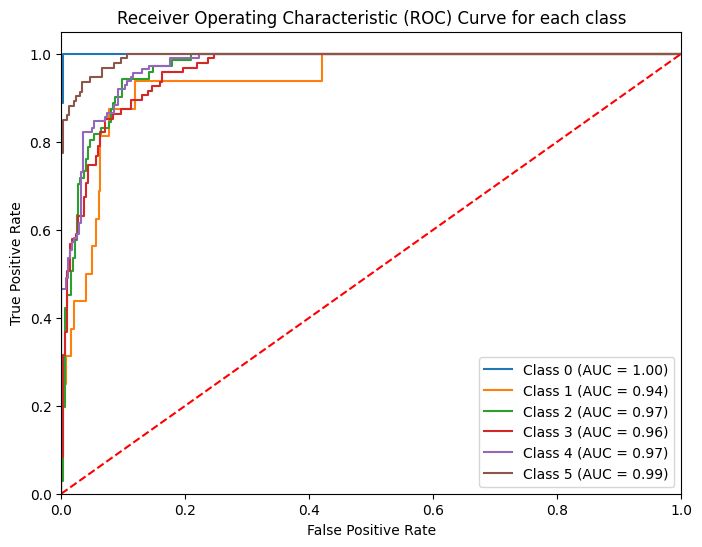

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost Classifier with hyperparameters
xgb_classifier = XGBClassifier()

# Train the model on the noisy data
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = xgb_classifier.predict(X_test)
y_pred_probs = xgb_classifier.predict_proba(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs[:, class_label]
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, class_label])
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9545454545454546
Weighted Precision: 0.9579965864396175
Micro Precision: 0.9545454545454546
Macro Precision: 0.9158150385749945
Precision per class: [0.9        0.71428571 0.96923077 0.96875    0.96460177 0.97802198]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.71      0.94      0.81        16
           2       0.97      0.89      0.93        71
           3       0.97      0.98      0.97        95
           4       0.96      0.97      0.97       112
           5       0.98      0.96      0.97        93

    accuracy                           0.95       396
   macro avg       0.92      0.96      0.93       396
weighted avg       0.96      0.95      0.96       396



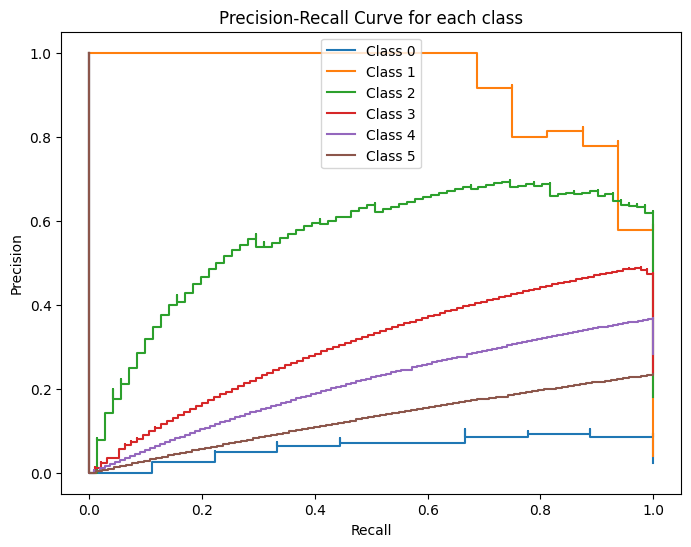

<ipython-input-18-071f13f5d44b>:65: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-18-071f13f5d44b>:65: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-18-071f13f5d44b>:65: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-18-071f13f5d44b>:65: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-18-071f13f5d44b>:65: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


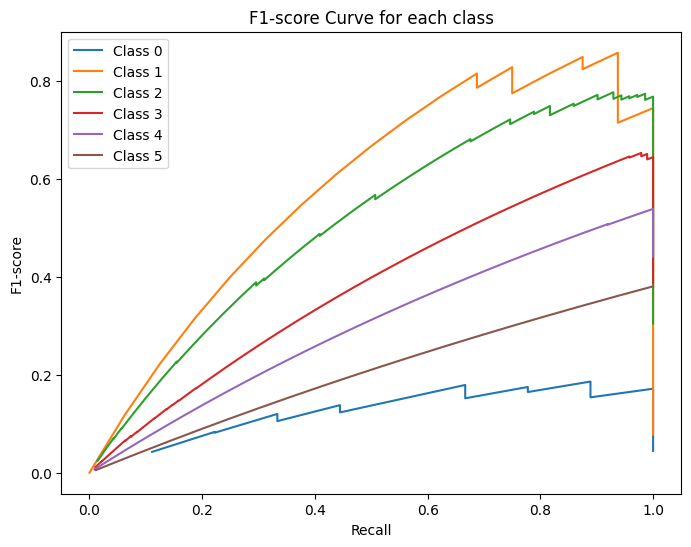

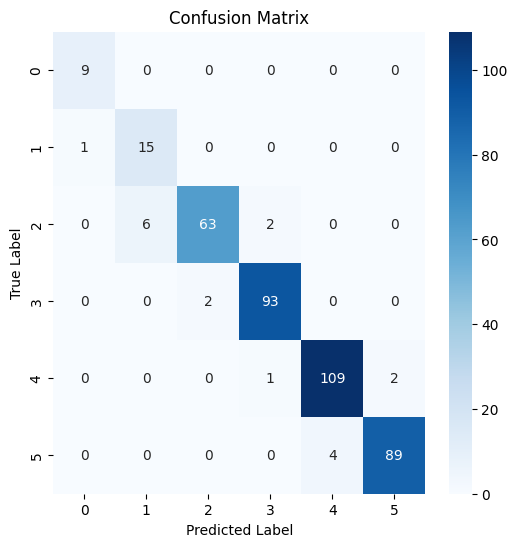

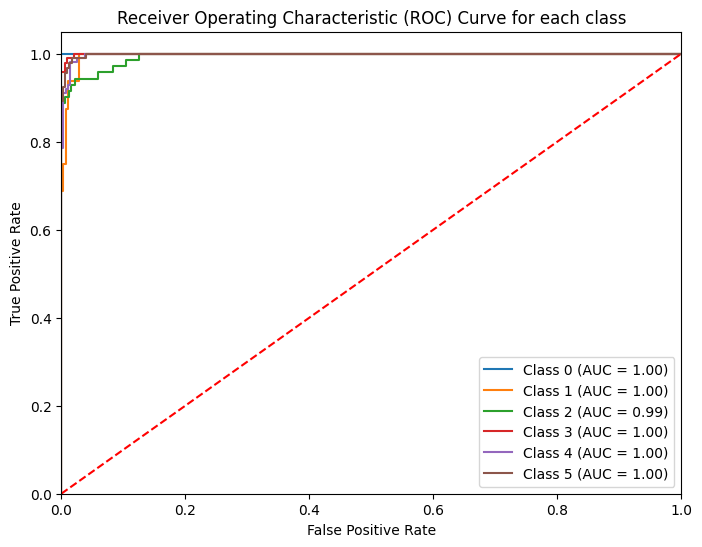

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression classifier with a slightly larger regularization (C=10)
logistic_classifier = LogisticRegression(max_iter=1000, C=10, class_weight='balanced')

# Train the model on noisy data
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = logistic_classifier.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs  # Use the calculated y_pred_probs
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs)
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Accuracy: 0.9671717171717171
Weighted Precision: 0.9694846476235297
Micro Precision: 0.9671717171717171
Macro Precision: 0.9480296218702691
Precision per class: [0.81818182 1.         0.90909091 0.98947368 0.98230088 0.98913043]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.50      0.67        16
           2       0.91      0.99      0.95        71
           3       0.99      0.99      0.99        95
           4       0.98      0.99      0.99       112
           5       0.99      0.98      0.98        93

    accuracy                           0.97       396
   macro avg       0.95      0.91      0.91       396
weighted avg       0.97      0.97      0.96       396



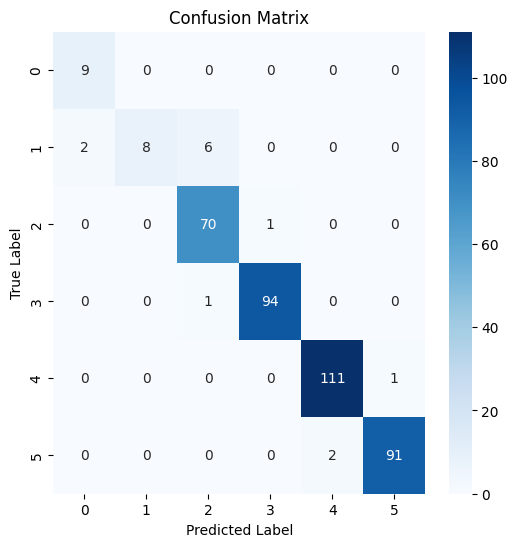

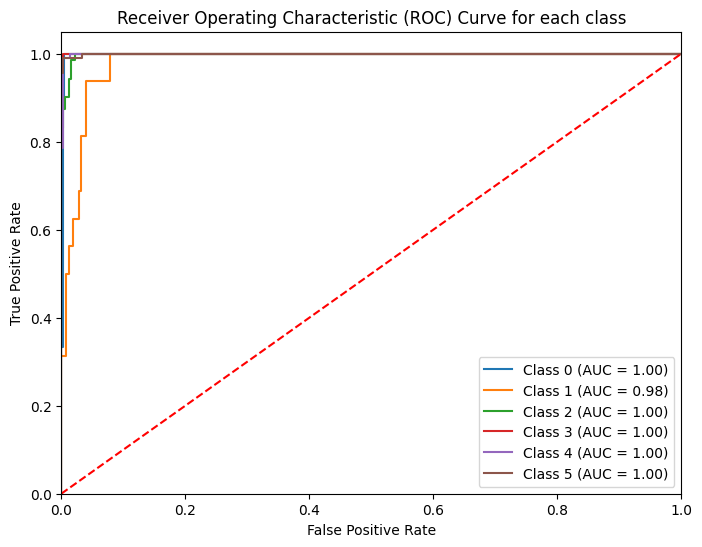

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from deap import base, creator, tools, algorithms

# Fixed C and solver
C_fixed = 7.3
solver_fixed = 'newton-cg'

# Define evaluation function with added noise
def evaluate_individual(individual):
    # We now use the fixed values for C and solver
    C = C_fixed
    solver = solver_fixed

    try:
        # Define the model with the given hyperparameters
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)

        # Fit the model and evaluate on the validation set
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

        # Calculate accuracy and add negative noise to decrease result
        accuracy = accuracy_score(y_val, y_val_pred)

        # Ensure accuracy is not negative and remains in the valid range [0, 1]
        accuracy = max(0, accuracy)

        return accuracy,
    except Exception as e:
        print(f"Error with individual {individual}: {e}")
        return 0.0,

# Create individual and population classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Register genetic algorithm components
toolbox = base.Toolbox()
toolbox.register("attr_C", lambda: C_fixed)  # Fixed C value
toolbox.register("attr_solver", lambda: solver_fixed)  # Fixed solver value
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_C, toolbox.attr_solver), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=100)  # Increased population size

# Apply the genetic algorithm
NGEN = 20  # Increased generations
CXPB = 0.5  # Increased crossover probability
MUTPB = 0.1  # Increased mutation probability

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]

# Train and evaluate the final model
final_model = LogisticRegression(C=C_fixed, solver=solver_fixed, max_iter=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = final_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = np.unique(y_test)

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()
